In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
house_data = pd.read_csv('CSV Files/house_price_regression_dataset.csv')
house_data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [47]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


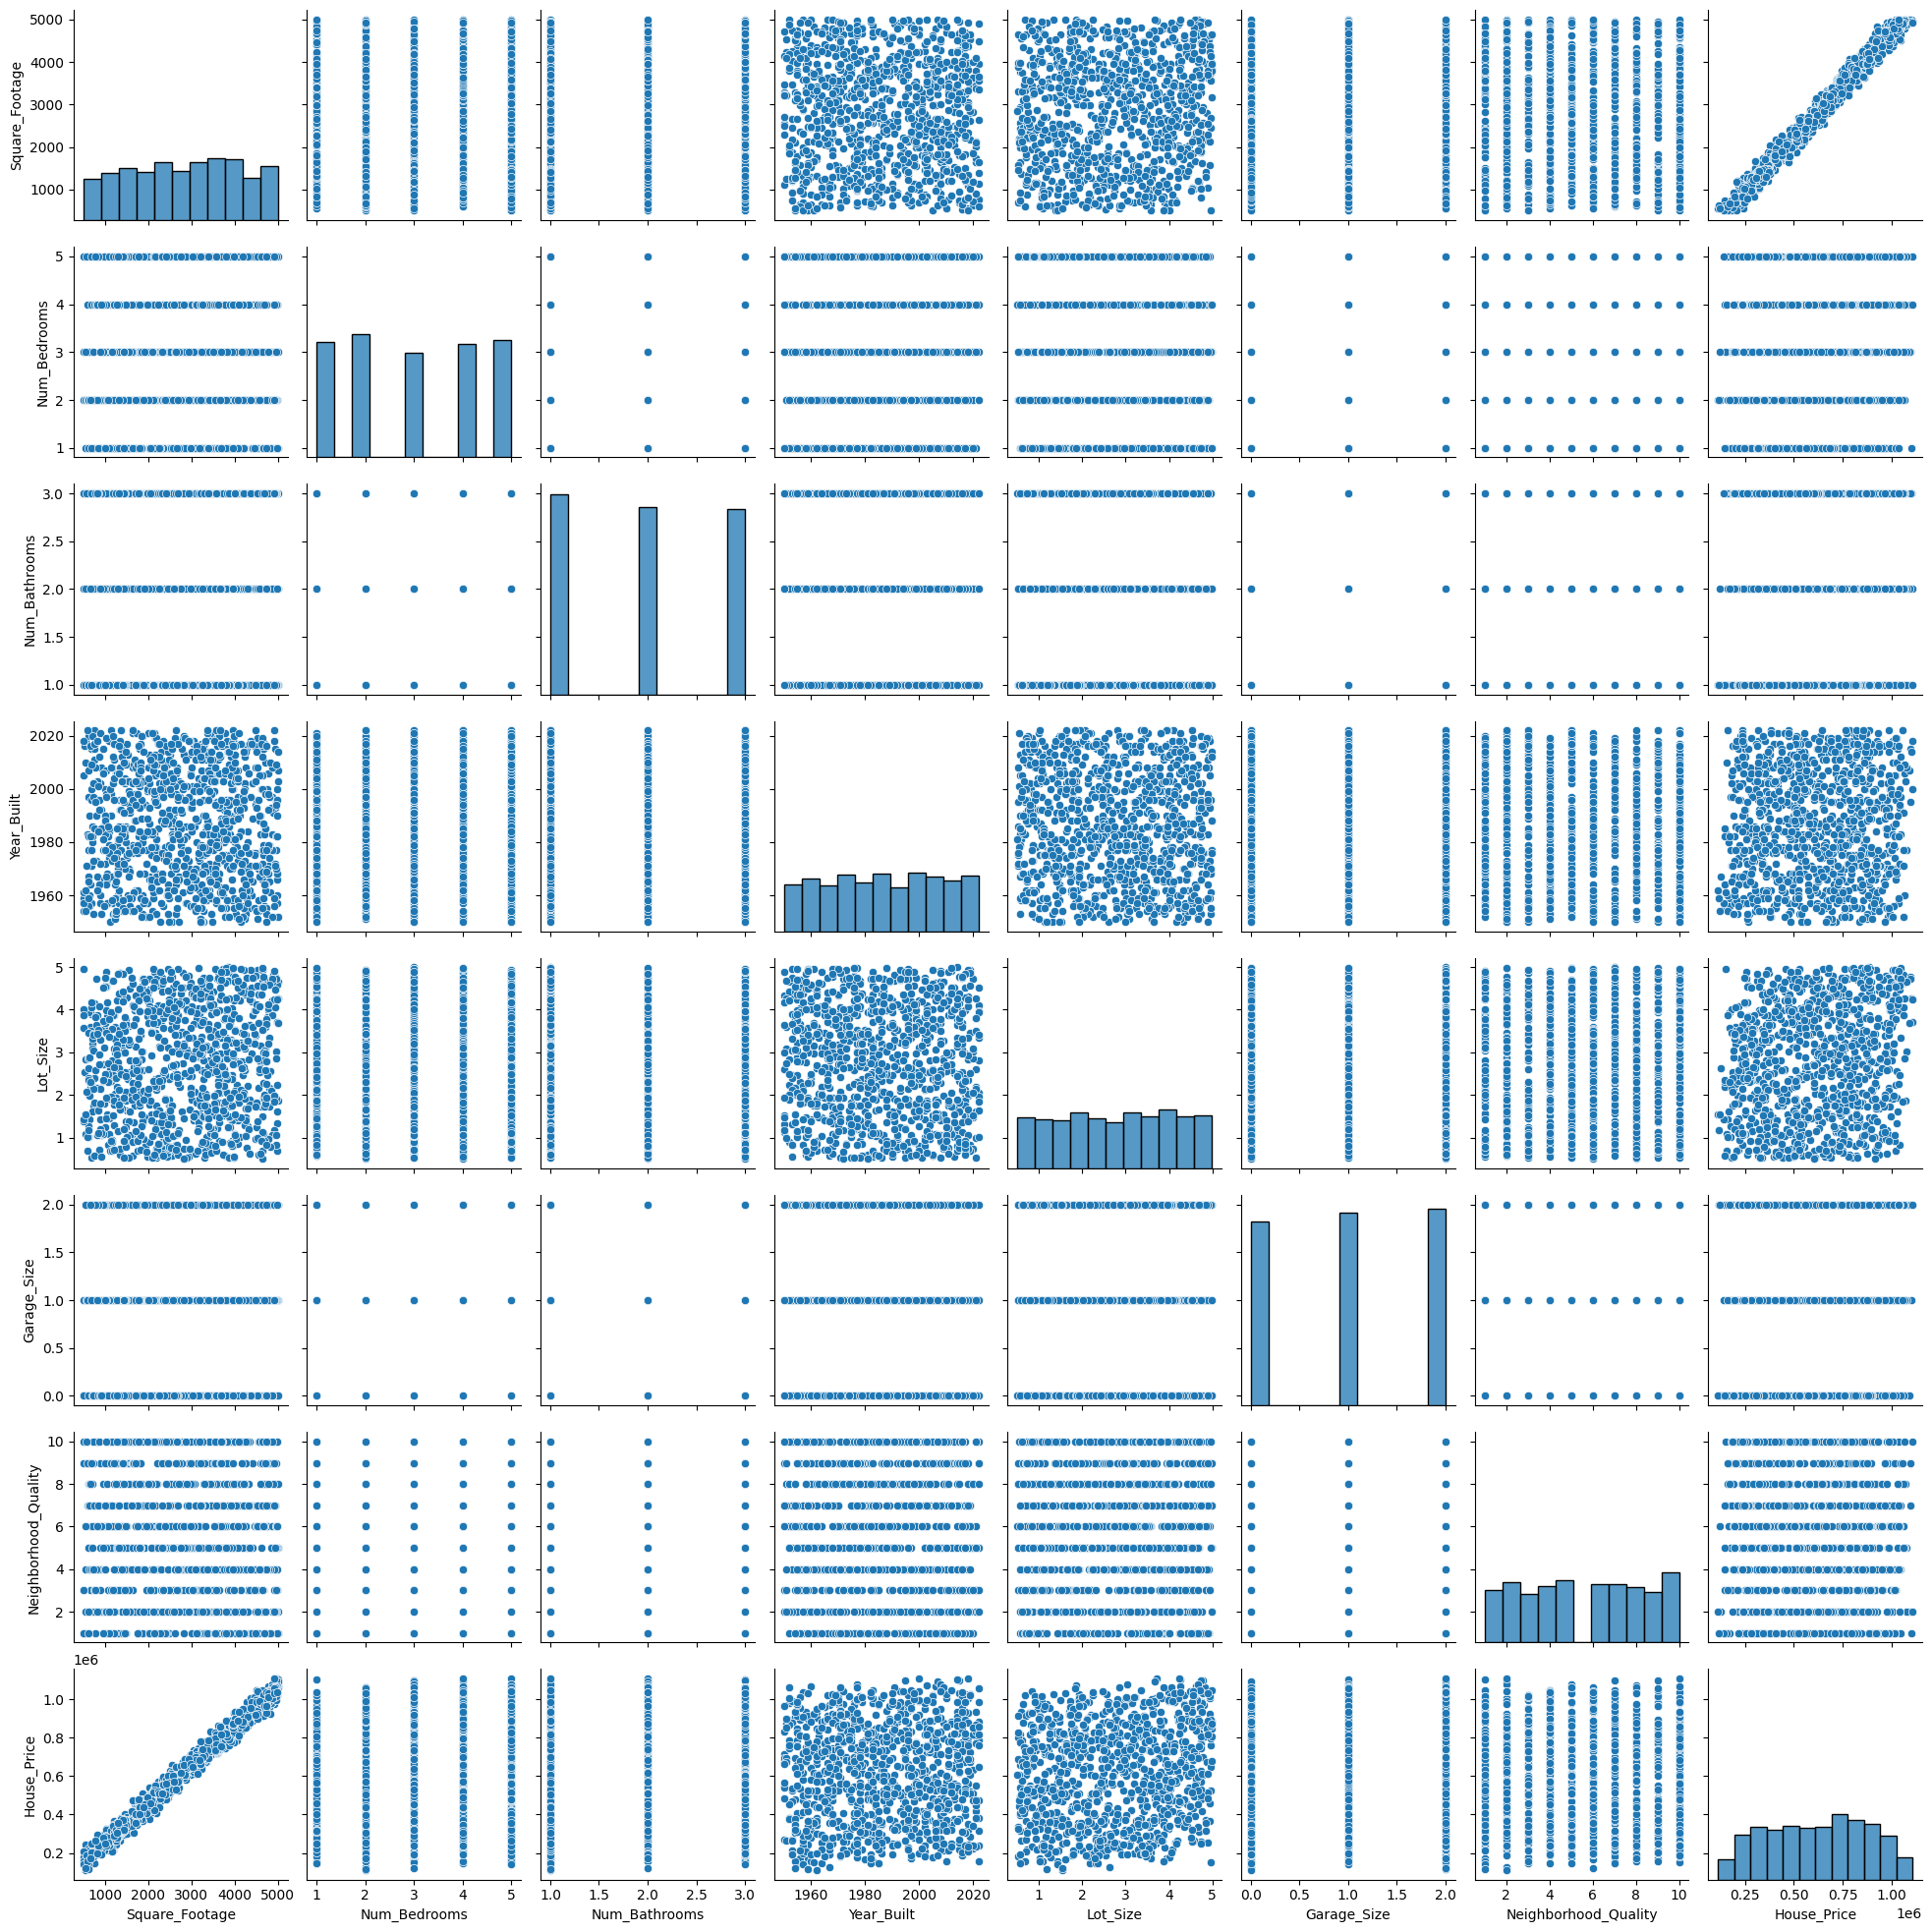

In [48]:
sns.pairplot(house_data)
plt.show()

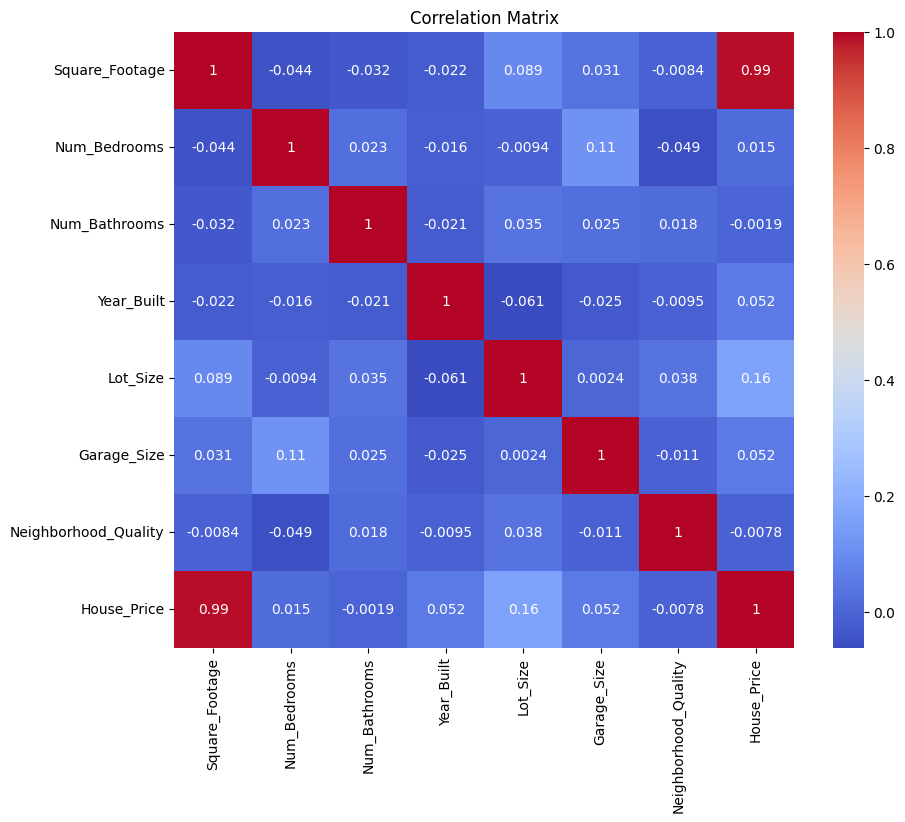

In [49]:
correlation_matrix = house_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [51]:
relevant_features = pd.DataFrame(house_data[['Square_Footage','House_Price']])
relevant_features.head()

,Square_Footage,House_Price
0,1360,2.623829e+05
1,4272,9.852609e+05
2,3592,7.779774e+05
3,966,2.296989e+05
4,4926,1.041741e+06


In [57]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
y_scaler = StandardScaler()
X= x_scaler.fit_transform(relevant_features[['Square_Footage']])
Y=y_scaler.fit_transform(relevant_features[['House_Price']])

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train,Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
Lr_pred = Lr.predict(X_test)
print(f" The mean squared error is : {mean_squared_error(X_test,Lr_pred)}")
print(f" The mean absolute error is : {mean_absolute_error(X_test,Lr_pred)}")
print(f" The R2_score is : {r2_score(X_test,Lr_pred)}")

 The mean squared error is : 4.9396998940969724e-05
 The mean absolute error is : 0.006085473793734436
 The R2_score is : 0.9999514973580705


In [68]:
area_sqft = 1360

input_data = [[area_sqft]]
input_scaled = x_scaler.transform(input_data)

output_scaled = Lr.predict(input_scaled)

output_actual = y_scaler.inverse_transform(output_scaled)

predicted_price = output_actual[0]
print(predicted_price)


[326986.41113908]


c:\Users\shivendra\Desktop\Practice\Machine learning Internshala\mlenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
